In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
cust_bank = pd.read_csv("Customer_and_bank details_p1.csv")
target = pd.read_csv("Customer_Response_data_P1.csv")
state = pd.read_csv("State_Master.csv")
region = pd.read_csv("Region_code_master.csv")
economic= pd.read_csv("Customer_social_economic_data_p1.csv")
city=pd.read_csv("City_Master.csv")
campaign=pd.read_csv("Customer_campaign_details_p1.csv")
region['Region_Code'] = region['Region_Code'].astype(str)
state['Region_Code'] = state['Region_Code'].astype(str)
cust_outcome=pd.merge(cust_bank,city,how='inner')
cust_outcome=pd.merge(cust_outcome,state,how='inner')
cust_outcome=pd.merge(cust_outcome,campaign,how='inner')
cust_outcome=pd.merge(cust_outcome,region,how='inner')
cust_outcome=pd.merge(cust_outcome,target,how='inner')
cust_outcome=pd.merge(cust_outcome,economic,how='inner')
cust_outcome.head()


,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,pdays,previous,poutcome,Region_Name,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,56,services,married,high.school,no,no,yes,3,S1,...,999,0,nonexistent,South,no,1.1,93.994,-36.4,4.857,5191.0
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,...,999,0,nonexistent,South,no,1.1,93.994,-36.4,4.857,5191.0
2,539,32,admin.,single,university.degree,no,no,no,3,S1,...,999,0,nonexistent,South,no,1.1,93.994,-36.4,4.857,5191.0
3,540,36,services,married,high.school,no,no,no,3,S1,...,999,0,nonexistent,South,no,1.1,93.994,-36.4,4.857,5191.0
4,997,31,blue-collar,married,basic.9y,no,no,no,3,S1,...,999,0,nonexistent,South,no,1.1,93.994,-36.4,4.856,5191.0


In [3]:
cust_outcome.columns

Index(['Customer_id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'Region_Code', 'State_Code', 'City_Code',
       'City_Name', 'State_Name', 'contact', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'Region_Name',
       'y', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed'],
      dtype='object')

In [4]:
cust_outcome.isnull().sum()

Customer_id       0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
Region_Code       0
State_Code        0
City_Code         0
City_Name         0
State_Name        0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
Region_Name       0
y                 0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

# Univariate, Bi- Variate Analysis and Multi- Variate Analysis

## Check Numeric and Categorical Features

In [5]:
# IDENTIFYING NUMERICAL FEATURES

numeric_data = cust_outcome.select_dtypes(include=np.number) # select_dtypes selects data with numeric features
numeric_col = numeric_data.columns  # we will store the numeric features in a variable

print("Numeric Features:")
print(numeric_data.head())
print("===="*20)

Numeric Features:
   Customer_id  age  duration  campaign  pdays  previous  emp.var.rate  \
0            1   56       307         1    999         0           1.1   
1            2   45       198         1    999         0           1.1   
2          539   32       389         1    999         0           1.1   
3          540   36       158         1    999         0           1.1   
4          997   31       196         2    999         0           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0          93.994          -36.4      4.857       5191.0  
1          93.994          -36.4      4.857       5191.0  
2          93.994          -36.4      4.857       5191.0  
3          93.994          -36.4      4.857       5191.0  
4          93.994          -36.4      4.856       5191.0  


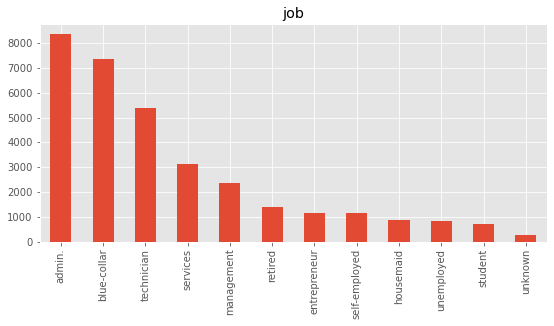

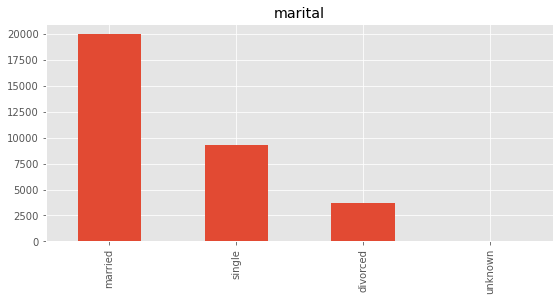

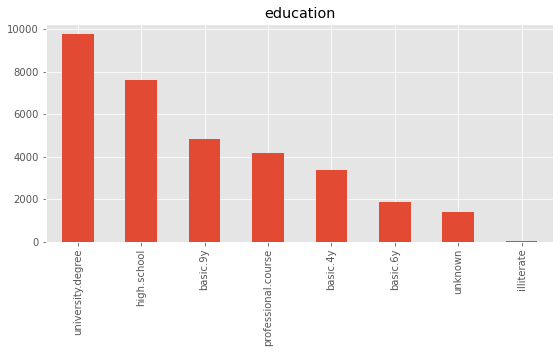

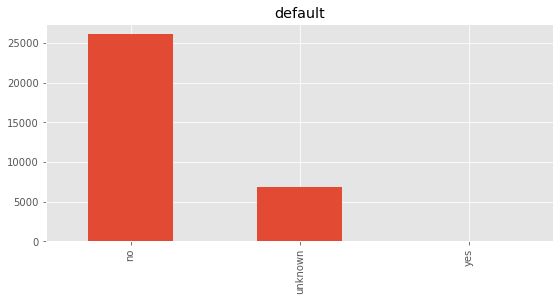

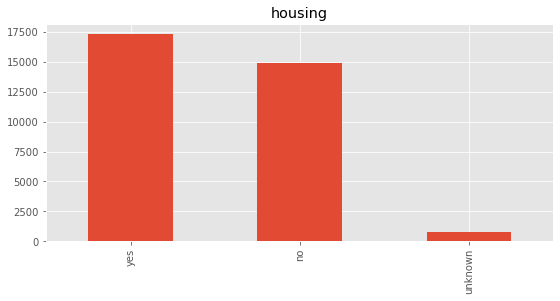

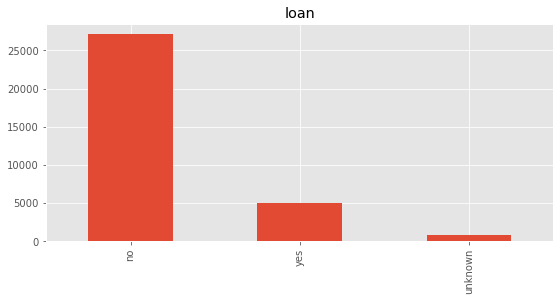

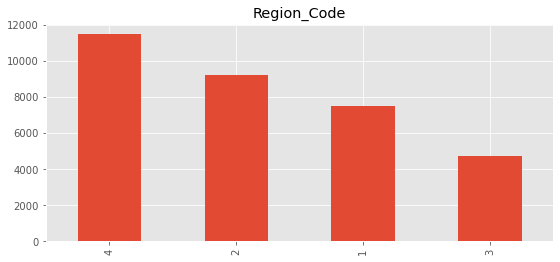

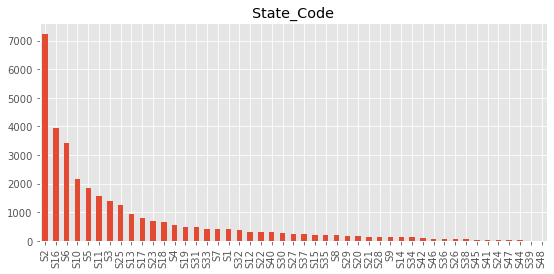

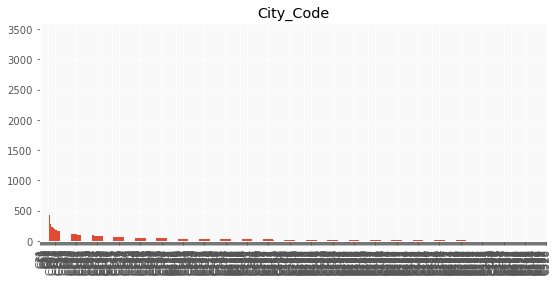

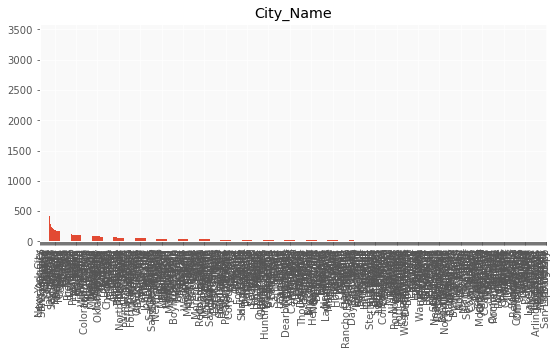

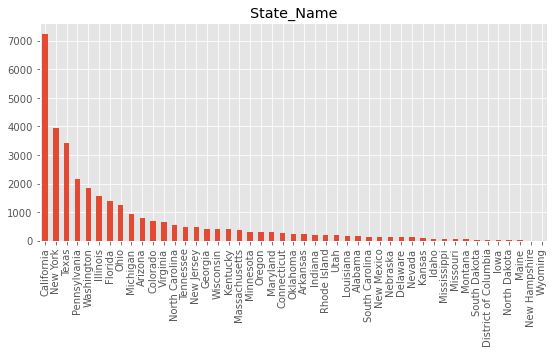

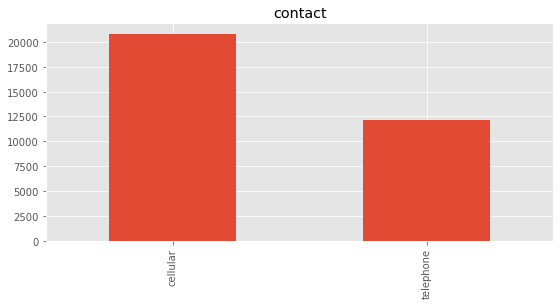

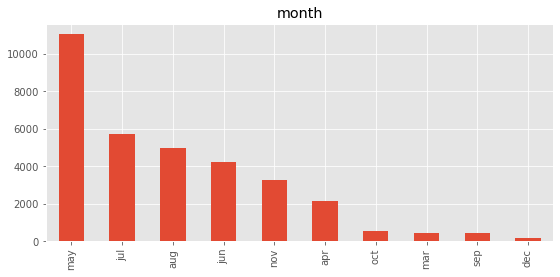

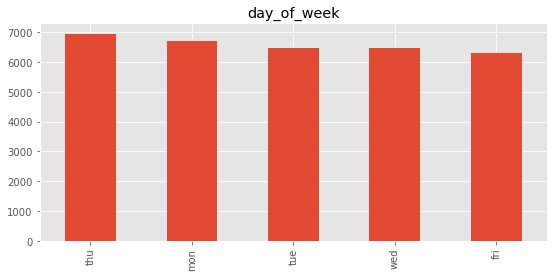

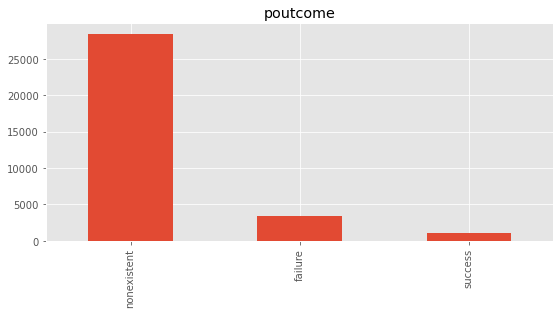

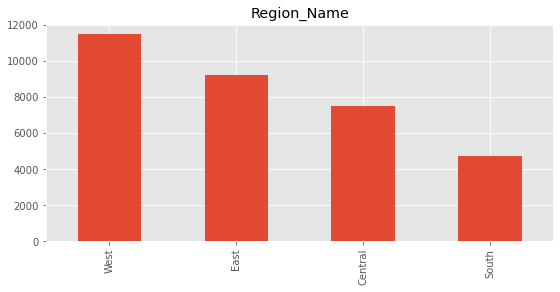

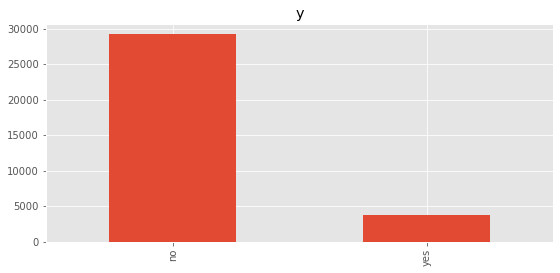

In [6]:
# Selecting the categorical columns
#categorical_col = dataframe.select_dtypes(include=['object']).columns
# Selecting the categorical columns
categorical_col = cust_outcome.select_dtypes(include=['object']).columns
plt.style.use('ggplot')
# Plotting a bar chart for each of the cateorical variable
for i in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    cust_outcome[i].value_counts().plot(kind='bar')
    plt.title(i)

## IDENTIFYING CATEGORICAL FEATURES

In [7]:
# CHECK THE DATATYPES OF ALL COLUMNS:
    
print(cust_outcome.dtypes)

Customer_id         int64
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
Region_Code        object
State_Code         object
City_Code          object
City_Name          object
State_Name         object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
Region_Name        object
y                  object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object


# EDA & Data Visualizations


## Univariate analysis of Categorical columns

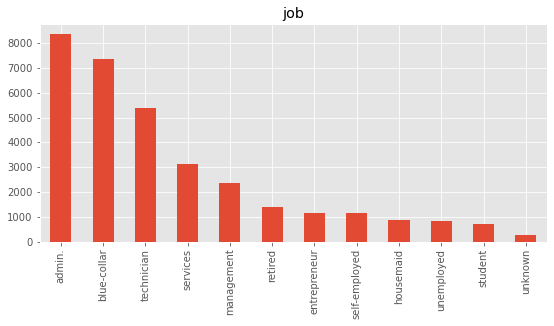

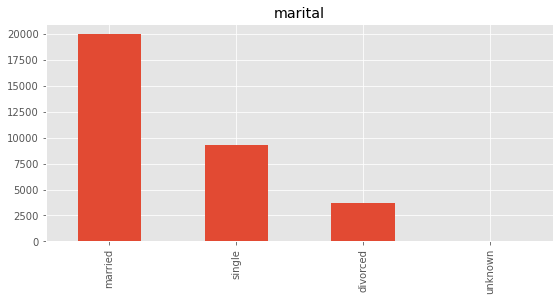

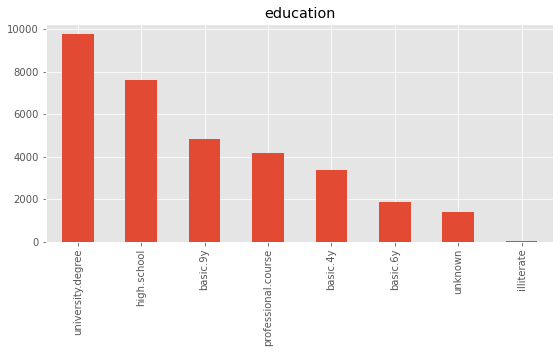

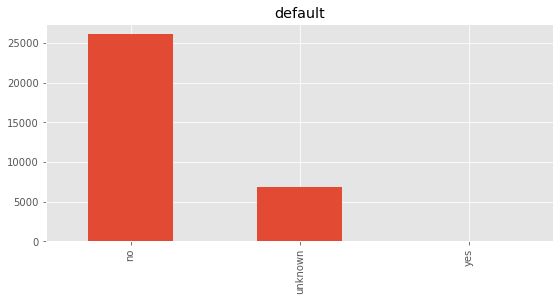

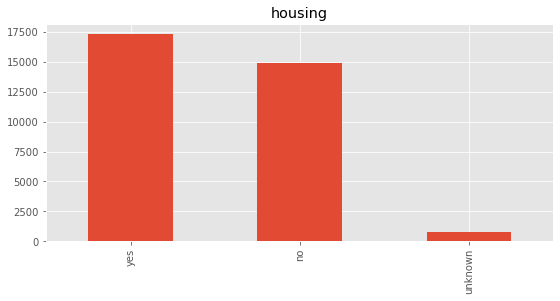

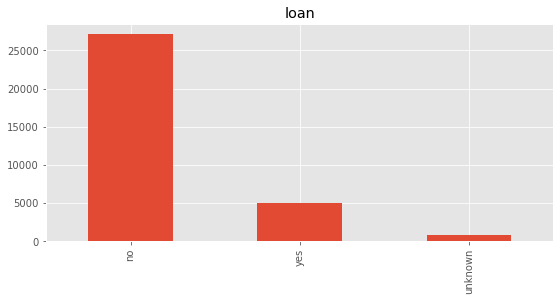

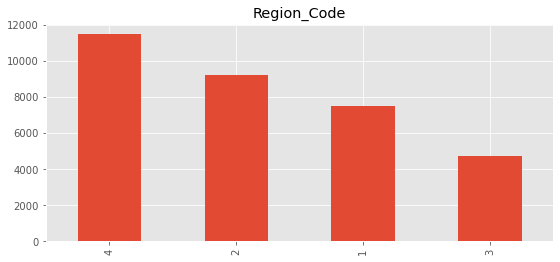

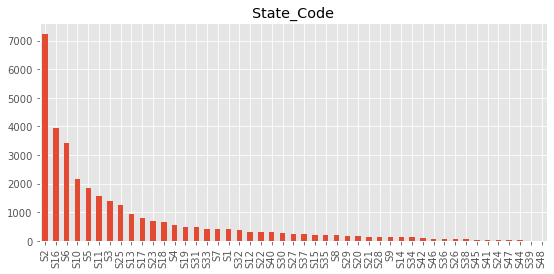

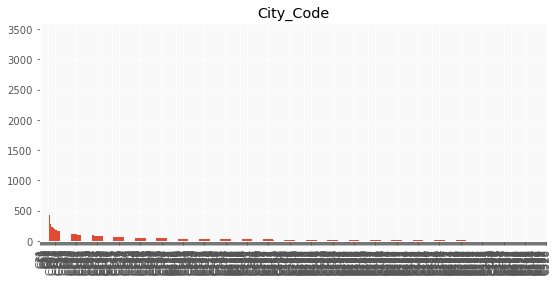

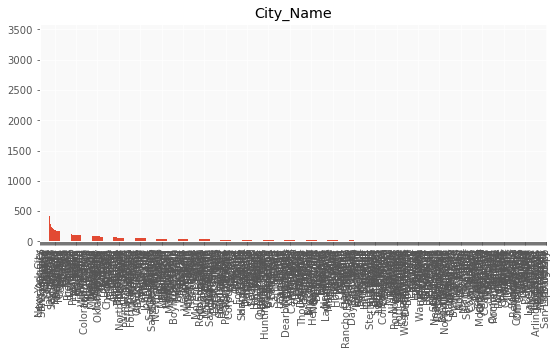

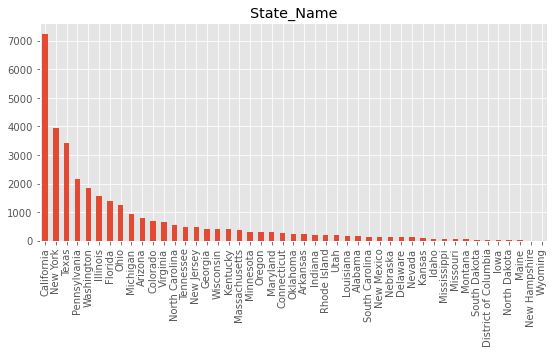

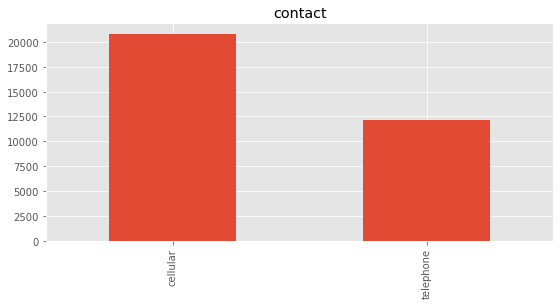

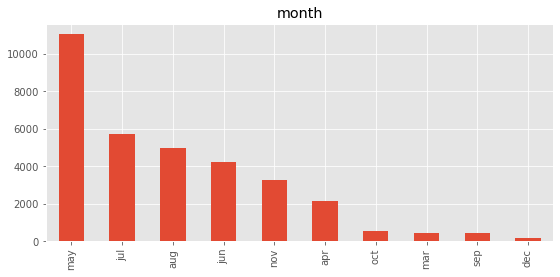

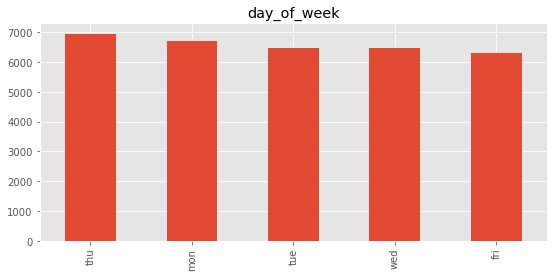

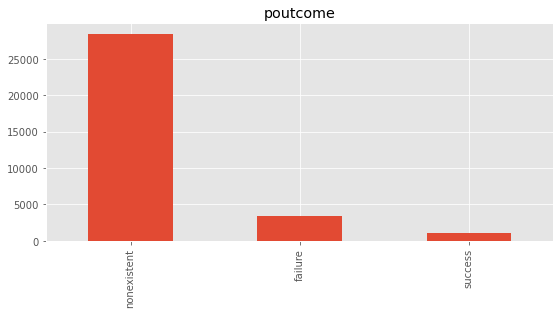

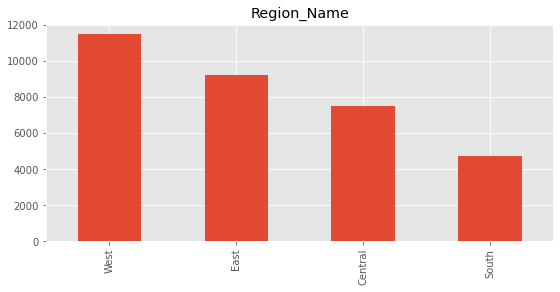

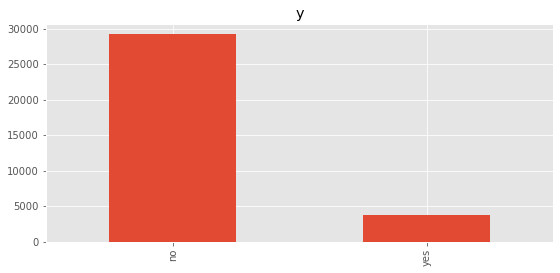

In [8]:
# Selecting the categorical columns
categorical_col = cust_outcome.select_dtypes(include=['object']).columns
plt.style.use('ggplot')
# Plotting a bar chart for each of the cateorical variable
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    cust_outcome[column].value_counts().plot(kind='bar')
    plt.title(column)

Observations : From the above visuals, we can make the following observations:

The top three professions that our customers belong to are - administration, blue-collar jobs and technicians. A huge number of the customers are married. Majority of the customers do not have a credit in default Many of our past customers have applied for a loan Cellular seem to be the most favoured method of reaching out to customers. Many customers have been contacted in the month of May.

# Univariate analysis of Continuous columns

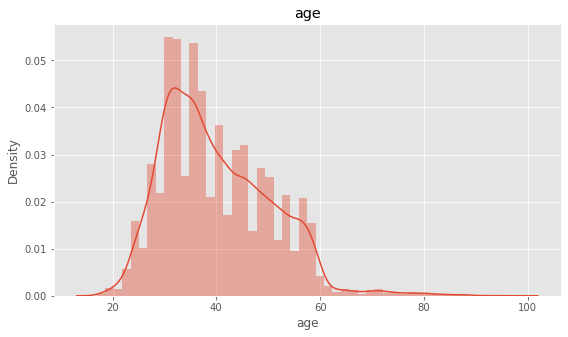

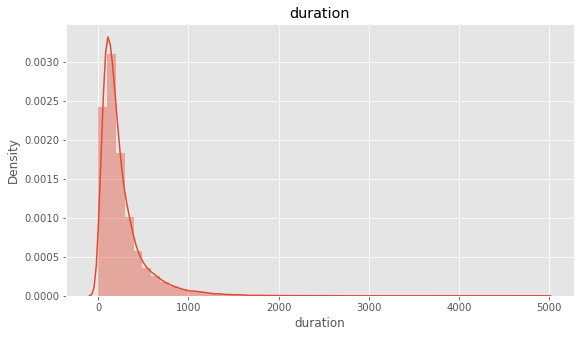

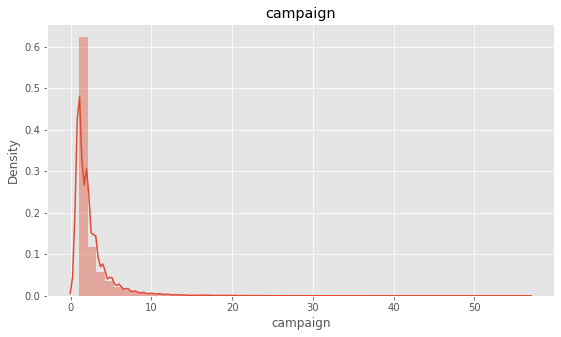

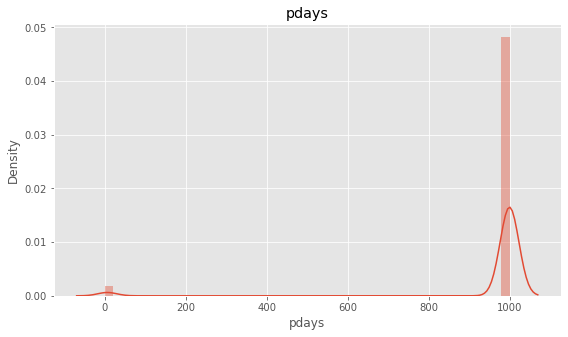

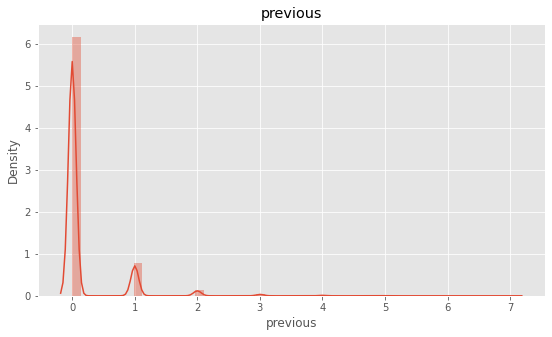

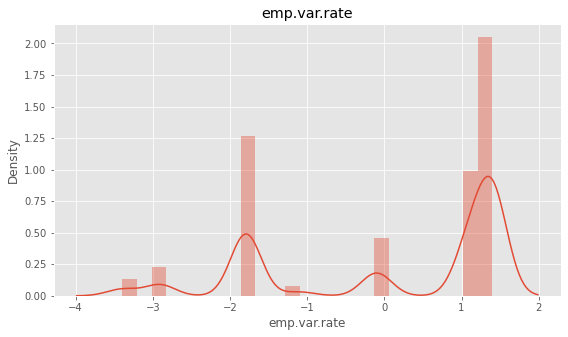

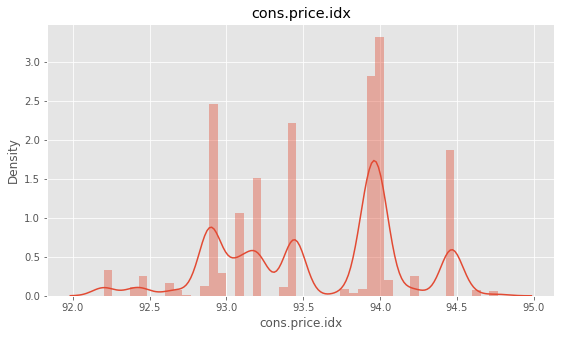

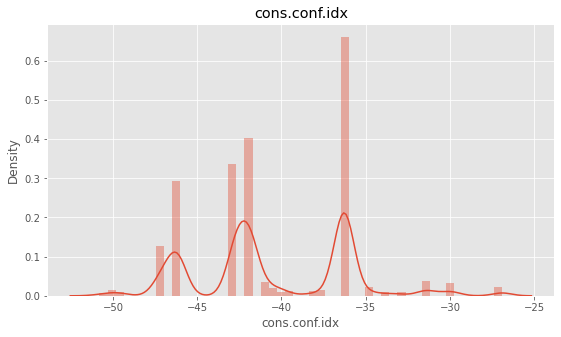

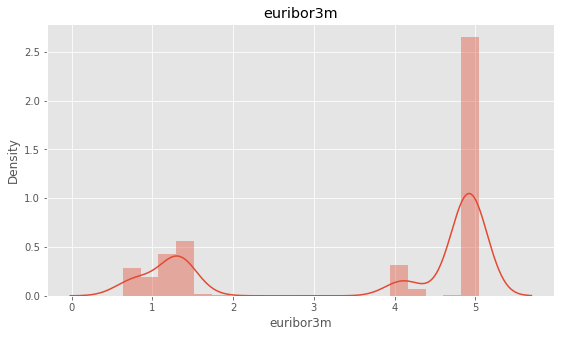

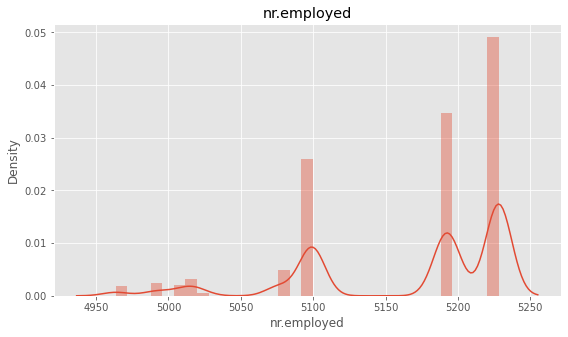

In [9]:
numeric_col = numeric_col.drop("Customer_id")
for column in numeric_col:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    sns.distplot(cust_outcome[column])
    plt.title(column)

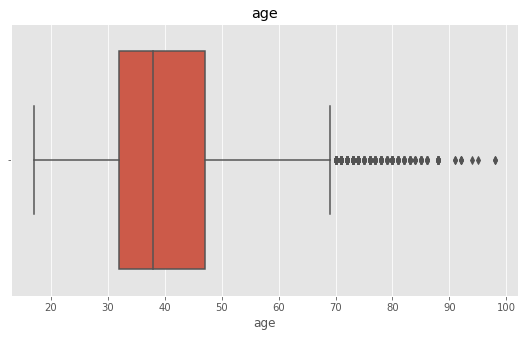

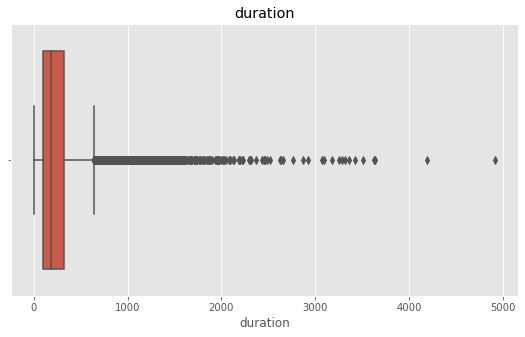

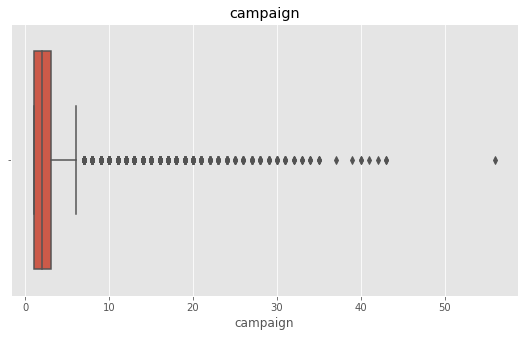

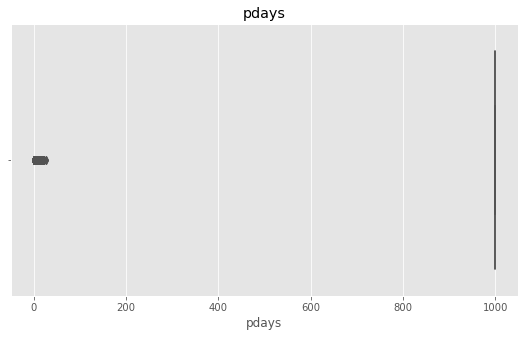

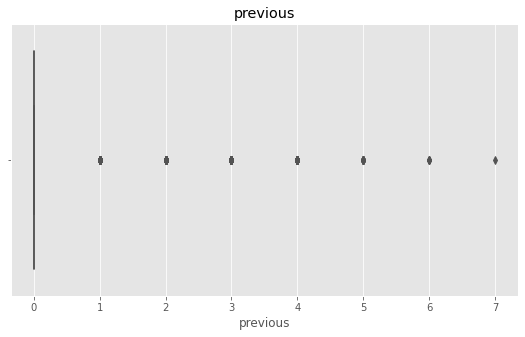

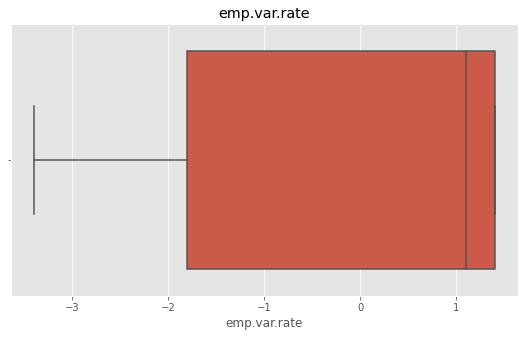

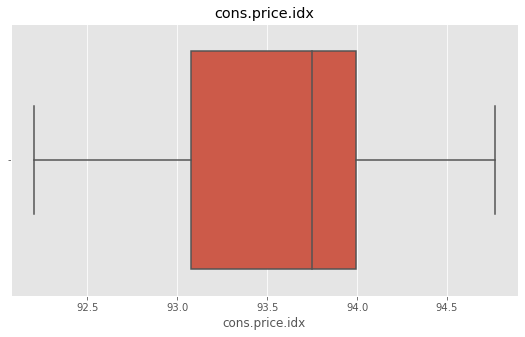

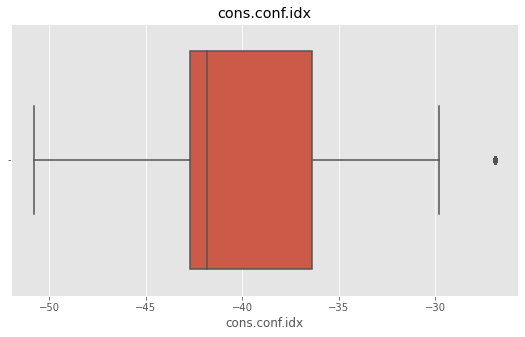

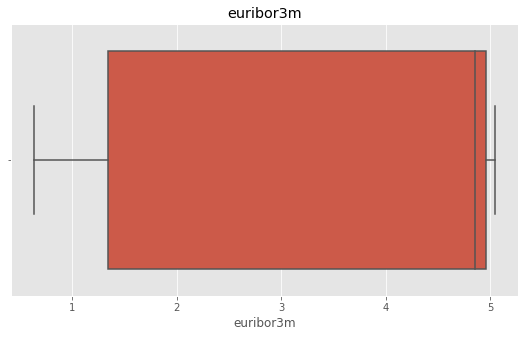

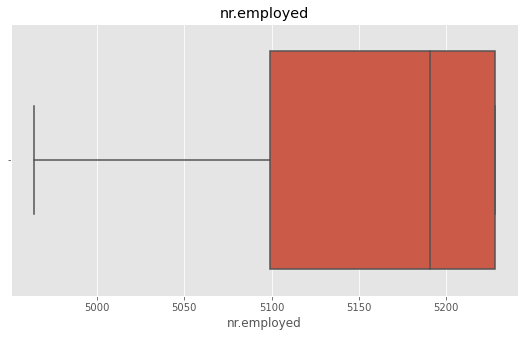

In [10]:
for column in numeric_col:
    plt.figure(figsize=(20,5))
    plt.subplot(122)
    sns.boxplot(cust_outcome[column])
    plt.title(column)

# Bivariate Analysis

We perform bi-variate analysis with 2 variables for any combination of categorical and continuous variables.
The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous.
Different methods are used to tackle these combinations during analysis process.

In [11]:
cust_outcome.columns

Index(['Customer_id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'Region_Code', 'State_Code', 'City_Code',
       'City_Name', 'State_Name', 'contact', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'Region_Name',
       'y', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed'],
      dtype='object')

# Bivariate Analysis - Categorical Columns

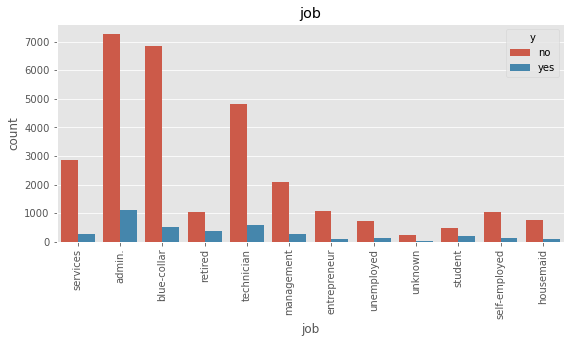

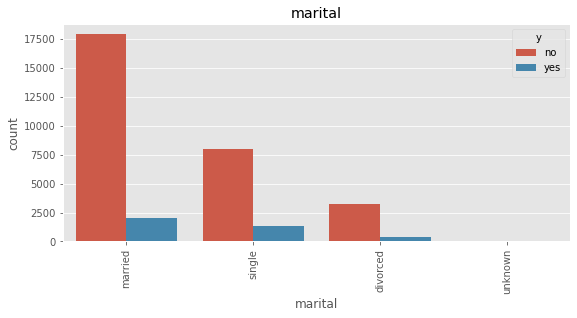

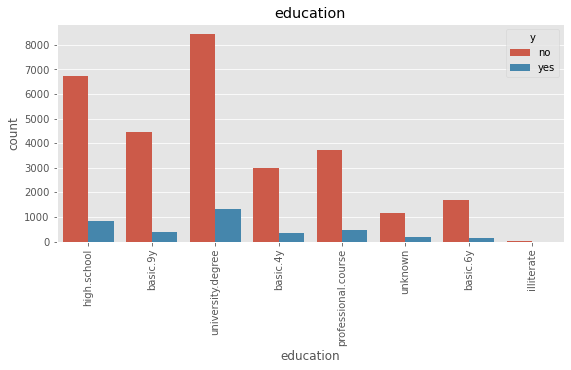

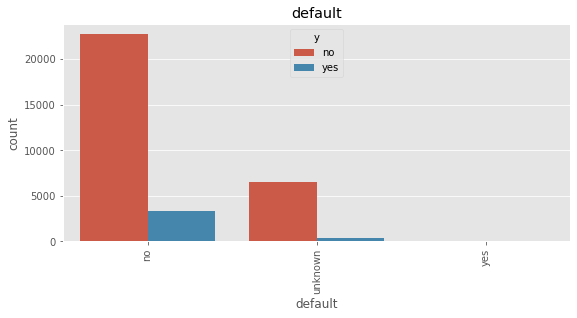

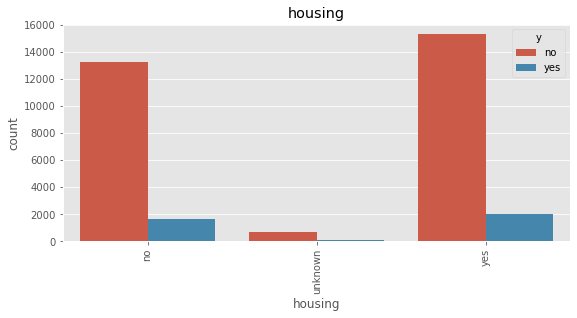

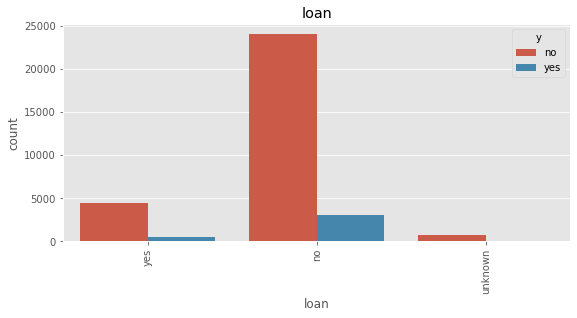

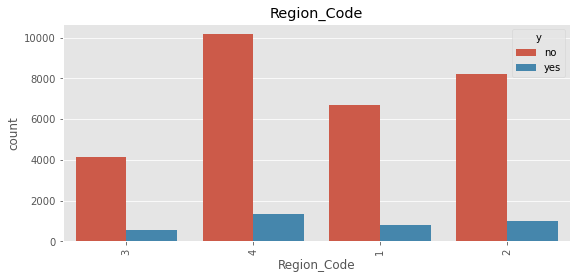

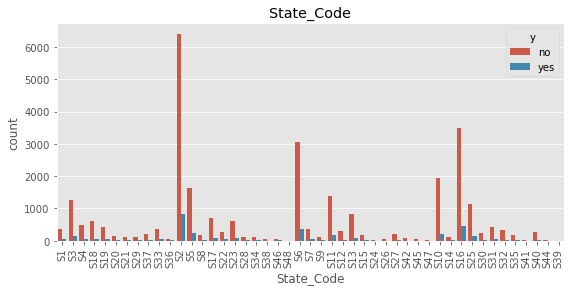

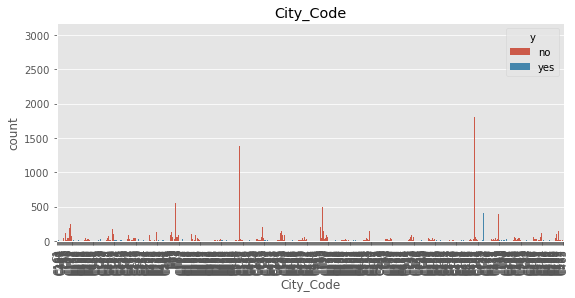

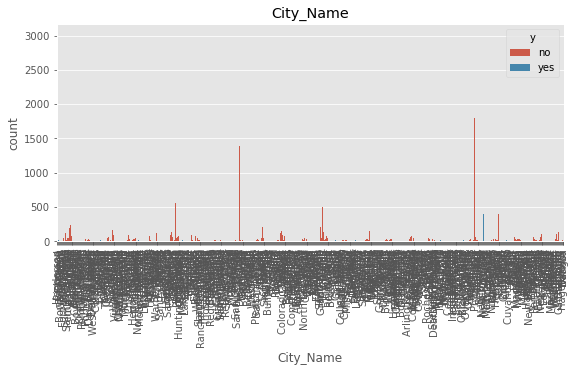

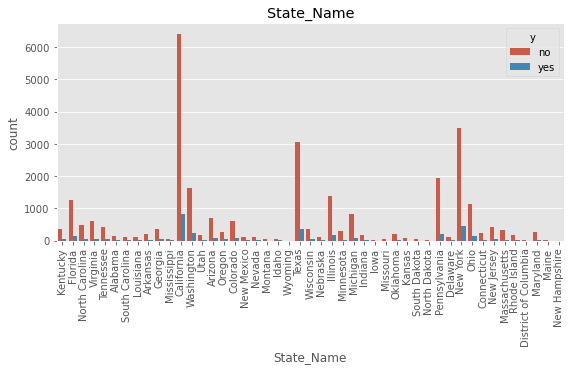

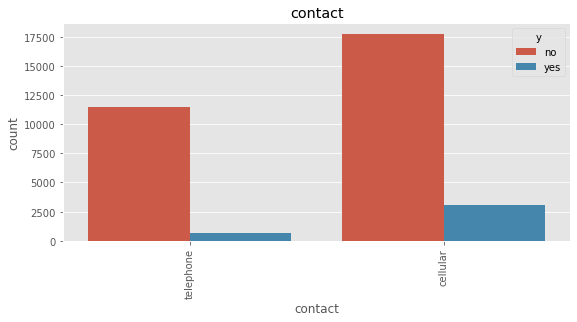

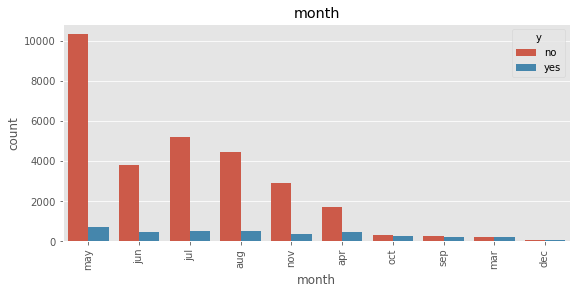

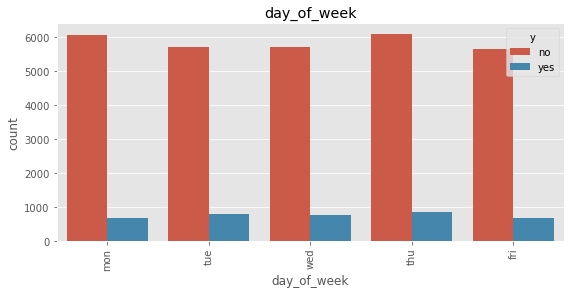

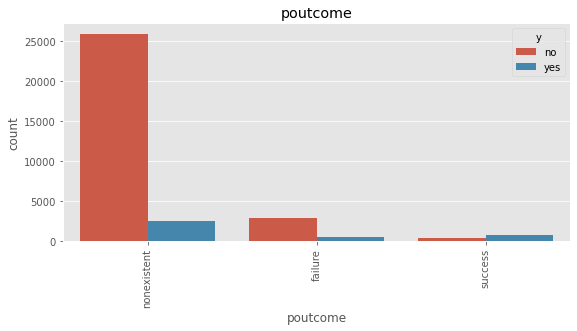

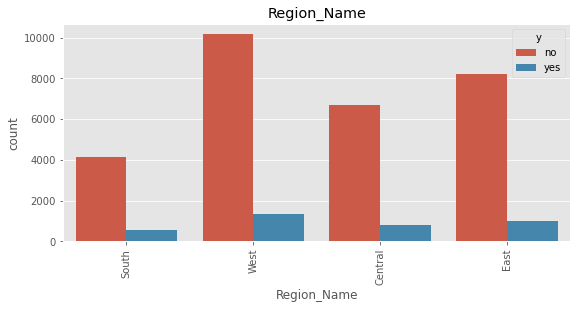

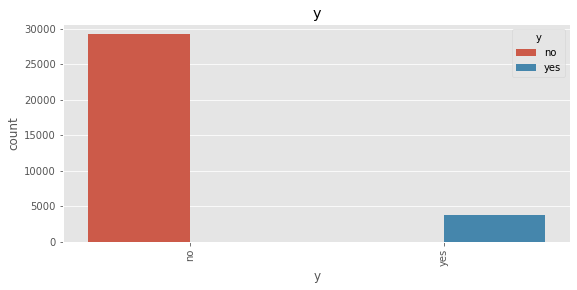

In [12]:
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=cust_outcome[column],hue=cust_outcome['y'],data=cust_outcome)
    plt.title(column)    
    plt.xticks(rotation=90)

Correlation matrix of numerical features

Text(0.5, 1.05, 'Pearson correlation of Features')

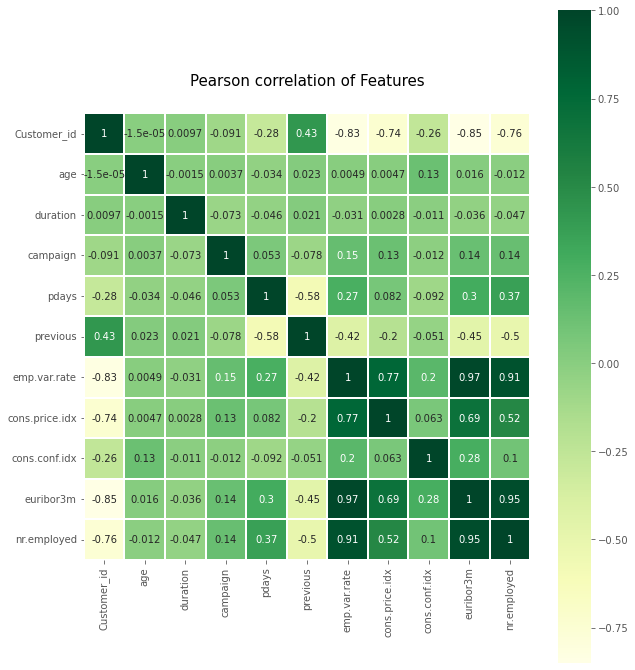

In [13]:
%matplotlib inline
corr = cust_outcome.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

# Multivariate Analysis

We perform multivariate analysis with more than 2 variables for any combination of categorical and continuous variables.
The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous.
Different methods are used to tackle these combinations during analysis process.

<Figure size 2160x720 with 0 Axes>

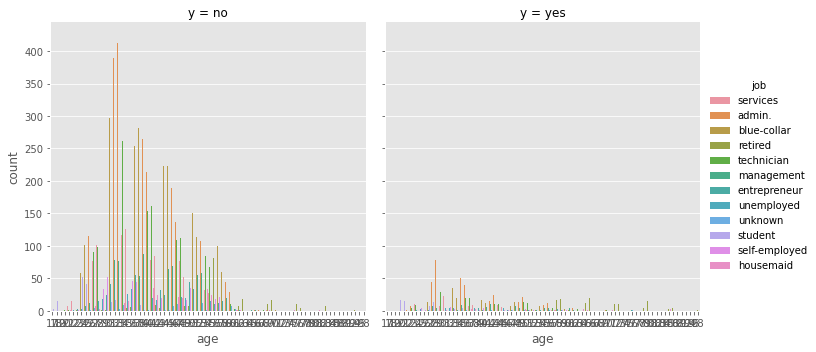

In [14]:
fig = plt.gcf() 
fig.set_size_inches(30, 10)
sns.catplot(data=cust_outcome,col = "y",x = "age", hue="job",kind = "count")

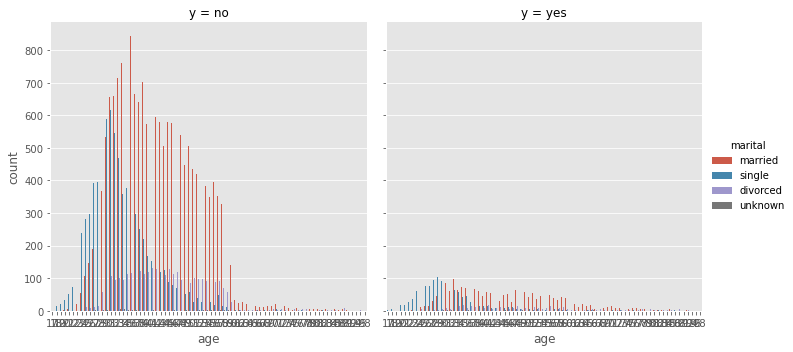

In [15]:
sns.catplot(data=cust_outcome,col = "y",x = "age", hue="marital",kind = "count")

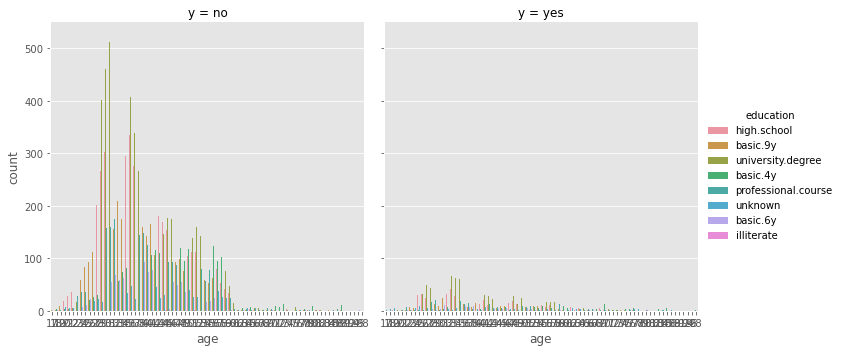

In [16]:
sns.catplot(data=cust_outcome,col = "y",x = "age", hue="education",kind = "count")

# Q2. Missing values identification and treatment

In [17]:
cust_outcome.duplicated().sum()

0

In [18]:
cust_outcome.isnull().sum()

Customer_id       0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
Region_Code       0
State_Code        0
City_Code         0
City_Name         0
State_Name        0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
Region_Name       0
y                 0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

# Q3.Outlier analysis and treatment

In [19]:
cust_outcome.reset_index(drop=True, inplace=True)

In [20]:
cust_outcome.head()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,pdays,previous,poutcome,Region_Name,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,56,services,married,high.school,no,no,yes,3,S1,...,999,0,nonexistent,South,no,1.1,93.994,-36.4,4.857,5191.0
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,...,999,0,nonexistent,South,no,1.1,93.994,-36.4,4.857,5191.0
2,539,32,admin.,single,university.degree,no,no,no,3,S1,...,999,0,nonexistent,South,no,1.1,93.994,-36.4,4.857,5191.0
3,540,36,services,married,high.school,no,no,no,3,S1,...,999,0,nonexistent,South,no,1.1,93.994,-36.4,4.857,5191.0
4,997,31,blue-collar,married,basic.9y,no,no,no,3,S1,...,999,0,nonexistent,South,no,1.1,93.994,-36.4,4.856,5191.0


In [21]:
cust_outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32938 entries, 0 to 32937
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     32938 non-null  int64  
 1   age             32938 non-null  int64  
 2   job             32938 non-null  object 
 3   marital         32938 non-null  object 
 4   education       32938 non-null  object 
 5   default         32938 non-null  object 
 6   housing         32938 non-null  object 
 7   loan            32938 non-null  object 
 8   Region_Code     32938 non-null  object 
 9   State_Code      32938 non-null  object 
 10  City_Code       32938 non-null  object 
 11  City_Name       32938 non-null  object 
 12  State_Name      32938 non-null  object 
 13  contact         32938 non-null  object 
 14  month           32938 non-null  object 
 15  day_of_week     32938 non-null  object 
 16  duration        32938 non-null  int64  
 17  campaign        32938 non-null 

In [22]:
cust_outcome.describe()

,Customer_id,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32938.000000,32938.000000,32938.000000,32938.000000,32938.000000,32938.000000,32938.000000,32938.000000,32938.00000,32938.000000,32938.000000
mean,18526.261127,40.051157,257.854484,2.577965,962.703959,0.172233,0.083791,93.576646,-40.49353,3.622058,5167.038123
std,10717.417593,10.432236,258.620698,2.796725,186.345297,0.494249,1.569630,0.578293,4.63066,1.735091,72.211548
min,1.000000,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.80000,0.634000,4963.600000
25%,9255.750000,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.70000,1.344000,5099.100000
50%,18533.500000,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.80000,4.857000,5191.000000
75%,27808.750000,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.40000,4.961000,5228.100000
max,37084.000000,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.90000,5.045000,5228.100000


<AxesSubplot:xlabel='age'>

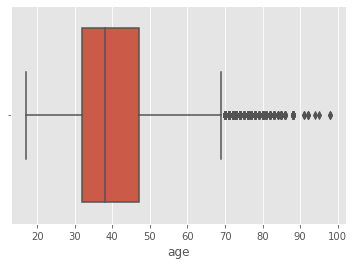

In [23]:
sns.boxplot(x='age', data=cust_outcome)

### Most of the customers are within the ages 17 to 70 with the highest frequency being in the range of 32 to 47. A few customers are aged between 70 to 100. Since it's a well spread population, the outliers do not require treatment

<AxesSubplot:xlabel='emp.var.rate'>

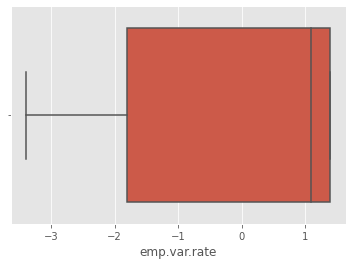

In [24]:
sns.boxplot(x='emp.var.rate', data=cust_outcome)

### There are no outliers in employment variation rate 

<AxesSubplot:xlabel='cons.price.idx'>

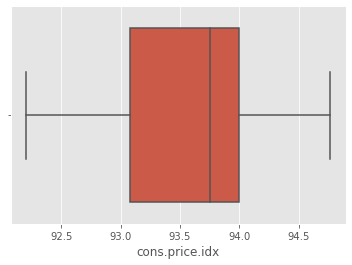

In [25]:
sns.boxplot(x='cons.price.idx', data=cust_outcome)

### There are no outliers in consumer price index 

<AxesSubplot:xlabel='cons.conf.idx'>

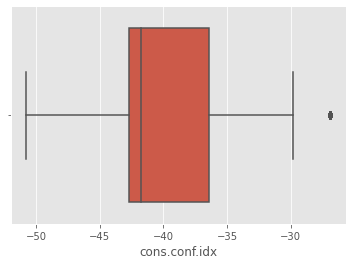

In [26]:
sns.boxplot(x='cons.conf.idx', data=cust_outcome)

There seems to be an outlier with data point much greater than the 95 percentile value.

<AxesSubplot:xlabel='cons.conf.idx'>

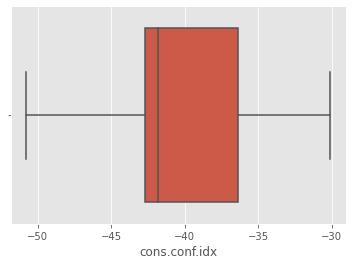

In [27]:
cust_outcome["cons.conf.idx"] = np.where(cust_outcome["cons.conf.idx"] > cust_outcome['cons.conf.idx'].quantile(0.975), 
                                         cust_outcome['cons.conf.idx'].quantile(0.975), cust_outcome['cons.conf.idx'])
sns.boxplot(x='cons.conf.idx', data=cust_outcome)

### Outlier in consumer confidence index is treated

<AxesSubplot:xlabel='euribor3m'>

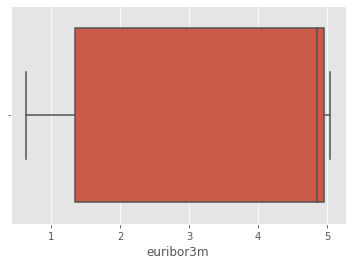

In [28]:
sns.boxplot(x='euribor3m', data=cust_outcome)

### There are no outliers in euribor 3 month rate, but the data seems to be skewed rightward

<AxesSubplot:xlabel='nr.employed'>

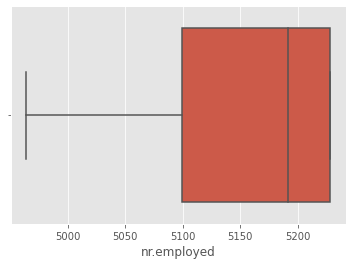

In [29]:
sns.boxplot(x='nr.employed', data=cust_outcome)

### There are no outliers in number of employees, but the data seems to be skewed rightward

# Q4.Data scaling 

In [30]:
cust_outcome.reset_index(drop=True, inplace=True)
cust_outcome.drop('Customer_id',axis=1,inplace=True)
cust_outcome.head()

,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code,...,pdays,previous,poutcome,Region_Name,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,services,married,high.school,no,no,yes,3,S1,C1,...,999,0,nonexistent,South,no,1.1,93.994,-36.4,4.857,5191.0
1,45,services,married,basic.9y,unknown,no,no,3,S1,C1,...,999,0,nonexistent,South,no,1.1,93.994,-36.4,4.857,5191.0
2,32,admin.,single,university.degree,no,no,no,3,S1,C1,...,999,0,nonexistent,South,no,1.1,93.994,-36.4,4.857,5191.0
3,36,services,married,high.school,no,no,no,3,S1,C1,...,999,0,nonexistent,South,no,1.1,93.994,-36.4,4.857,5191.0
4,31,blue-collar,married,basic.9y,no,no,no,3,S1,C1,...,999,0,nonexistent,South,no,1.1,93.994,-36.4,4.856,5191.0


In [31]:
cust_outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32938 entries, 0 to 32937
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32938 non-null  int64  
 1   job             32938 non-null  object 
 2   marital         32938 non-null  object 
 3   education       32938 non-null  object 
 4   default         32938 non-null  object 
 5   housing         32938 non-null  object 
 6   loan            32938 non-null  object 
 7   Region_Code     32938 non-null  object 
 8   State_Code      32938 non-null  object 
 9   City_Code       32938 non-null  object 
 10  City_Name       32938 non-null  object 
 11  State_Name      32938 non-null  object 
 12  contact         32938 non-null  object 
 13  month           32938 non-null  object 
 14  day_of_week     32938 non-null  object 
 15  duration        32938 non-null  int64  
 16  campaign        32938 non-null  int64  
 17  pdays           32938 non-null 

In [32]:
print("The data has {} rows with {} features/columns".format(cust_outcome.shape[0], cust_outcome.shape[1])) #Viewing the shape our dataset

The data has 32938 rows with 27 features/columns


In [33]:
cust_outcome.duplicated().value_counts()

False    32936
True         2
dtype: int64

# No Duplicate Values in the dataset

In [34]:
#Droping all the unknown/Na values
cust_outcome.drop(cust_outcome[cust_outcome['Region_Code'] == 'Na'].index, inplace = True)
cust_outcome.drop(cust_outcome[cust_outcome['job'] == 'unknown'].index, inplace = True)
cust_outcome.drop(cust_outcome[cust_outcome['education'] == 'unknown'].index, inplace = True)
cust_outcome.drop(cust_outcome[cust_outcome['marital'] == 'unknown'].index, inplace = True)
cust_outcome.drop(cust_outcome[cust_outcome['default'] == 'unknown'].index, inplace = True)
cust_outcome.drop(cust_outcome[cust_outcome['housing'] == 'unknown'].index, inplace = True)
cust_outcome.drop(cust_outcome[cust_outcome['loan'] == 'unknown'].index, inplace = True)

In [35]:
print("The data has {} rows with {} features/columns".format(cust_outcome.shape[0], cust_outcome.shape[1])) #Viewing the shape our dataset

The data has 24429 rows with 27 features/columns


In [36]:
cust_outcome.duplicated().value_counts()

False    24427
True         2
dtype: int64

# Scaling our numerical Data

Scale features using statistics that are robust to outliers.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method.

Standardization of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean / variance in a negative way. In such cases, the median and the interquartile range often give better results.

In [76]:
#DATA EXPLORATION
cust_outcome.select_dtypes(include=["int64", "float64"]).describe().T

,count,mean,std,min,25%,50%,75%,max
age,24429.0,0.136873,0.689440,-1.333333,-0.400000,0.0,0.600000,3.866667
duration,24429.0,259.147857,262.029681,0.000000,103.000000,181.0,321.000000,4918.000000
campaign,24429.0,2.532605,2.746176,1.000000,1.000000,2.0,3.000000,43.000000
pdays,24429.0,956.645217,200.663412,0.000000,999.000000,999.0,999.000000,999.000000
previous,24429.0,0.193827,0.522744,0.000000,0.000000,0.0,0.000000,7.000000
emp.var.rate,24429.0,-0.365194,0.502634,-1.406250,-0.906250,0.0,0.093750,0.093750
cons.price.idx,24429.0,0.087344,0.635361,-1.352557,-0.401523,0.0,0.598477,1.439608
cons.conf.idx,24429.0,0.183220,0.742901,-1.428571,-0.142857,0.0,0.857143,1.857143
euribor3m,24429.0,-0.382413,0.487383,-1.157346,-0.971217,0.0,0.028783,0.051809
nr.employed,24429.0,-0.233659,0.582065,-1.762791,-0.712403,0.0,0.287597,0.287597


In [38]:
from sklearn.preprocessing import RobustScaler
#SCALING NUMERICAL DATA using robust scaler
# retrieve just the numeric input values
num_cols = ['emp.var.rate',"age", 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']
# perform a robust scaler transform of the dataset
trans = RobustScaler()
cust_outcome[num_cols] = trans.fit_transform(cust_outcome[num_cols])

In [77]:
cust_outcome.head()

,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code,...,pdays,previous,poutcome,Region_Name,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.266667,services,married,high.school,no,no,yes,3,S1,C1,...,999,0,nonexistent,South,no,0.0,0.598477,0.857143,0.000274,0.0
2,-0.333333,admin.,single,university.degree,no,no,no,3,S1,C1,...,999,0,nonexistent,South,no,0.0,0.598477,0.857143,0.000274,0.0
3,-0.066667,services,married,high.school,no,no,no,3,S1,C1,...,999,0,nonexistent,South,no,0.0,0.598477,0.857143,0.000274,0.0
4,-0.400000,blue-collar,married,basic.9y,no,no,no,3,S1,C1,...,999,0,nonexistent,South,no,0.0,0.598477,0.857143,0.000000,0.0
9,0.800000,services,married,high.school,no,no,yes,3,S1,C1,...,999,0,nonexistent,South,no,0.0,0.598477,0.857143,0.000000,0.0


In [78]:
from matplotlib.pyplot import figure

figure(figsize=(50, 30), dpi=100)

cust_outcome.hist(figsize=[300,100])

plt.show()

<Figure size 5000x3000 with 0 Axes>

In [79]:
X = cust_outcome.drop(columns=[ "y","duration"]) #dropping the duration column
y = cust_outcome["y"]
print(X.shape)
print(y.shape)

(24429, 25)
(24429,)


Also we will also drop the duration column because this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.

In [80]:
from sklearn.preprocessing import OneHotEncoder

enc=OneHotEncoder(sparse=False)
cust_outcome1=cust_outcome
columns=['job', 'marital', 'education', 'default',
          'housing', 'loan','contact','month','day_of_week','poutcome']
for col in columns:
       # creating an exhaustive list of all possible categorical values
        data=cust_outcome[[col]]                                                                              
        enc.fit(data)
       # Fitting One Hot Encoding on train data
        temp = enc.transform(cust_outcome[[col]])
       # Changing the encoded features into a data frame with new column names
        temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col].value_counts().index])
       # In side by side concatenation index values should be same
       # Setting the index values similar to the X_train data frame
        temp=temp.set_index(cust_outcome.index.values)
       # adding the new One Hot Encoded varibales to the train data frame
        cust_outcome1=pd.concat([cust_outcome1,temp],axis=1)

In [44]:
cust_outcome1.head(3)

,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code,...,month_sep,month_dec,day_of_week_thu,day_of_week_mon,day_of_week_wed,day_of_week_tue,day_of_week_fri,poutcome_nonexistent,poutcome_failure,poutcome_success
0,1.266667,services,married,high.school,no,no,yes,3,S1,C1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.333333,admin.,single,university.degree,no,no,no,3,S1,C1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.066667,services,married,high.school,no,no,no,3,S1,C1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [45]:
cust_outcome1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'Region_Code', 'State_Code', 'City_Code', 'City_Name', 'State_Name',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Region_Name', 'y', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_technician', 'job_services',
       'job_management', 'job_retired', 'job_self-employed',
       'job_entrepreneur', 'job_unemployed', 'job_housemaid', 'job_student',
       'marital_married', 'marital_single', 'marital_divorced',
       'education_university.degree', 'education_high.school',
       'education_professional.course', 'education_basic.9y',
       'education_basic.4y', 'education_basic.6y', 'education_illiterate',
       'default_no', 'default_yes', 'housing_yes', 'housing_no', 'loan_no',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_may',
       'mont

In [81]:
cust_outcome1['housing']= cust_outcome1["housing"].replace(['yes','no'],['1','0'])
cust_outcome1['loan']= cust_outcome1["loan"].replace(['yes','no'],['1','0'])
cust_outcome1['y']= cust_outcome1["y"].replace(['yes','no'],['1','0'])
cust_outcome1['default']= cust_outcome1["default"].replace(['yes','no'],['1','0'])
inplace=True
cust_outcome1.tail()

,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code,...,month_sep,month_dec,day_of_week_thu,day_of_week_mon,day_of_week_wed,day_of_week_tue,day_of_week_fri,poutcome_nonexistent,poutcome_failure,poutcome_success
32929,0.000000,admin.,married,high.school,0,0,0,2,S44,C295,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
32932,0.666667,admin.,married,high.school,0,1,0,2,S39,C463,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
32933,-0.066667,admin.,married,high.school,0,1,0,2,S39,C463,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
32935,0.200000,self-employed,married,basic.9y,0,1,1,2,S39,C463,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
32937,-0.466667,technician,single,university.degree,0,0,0,2,S39,C463,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [82]:
cust_outcome1['housing']= cust_outcome1["housing"].replace(['unknown','0'])
cust_outcome1['loan']= cust_outcome1["loan"].replace(['unknown','0'])
cust_outcome1['default']= cust_outcome1["default"].replace(['unknown','0'])

In [50]:
cust_outcome1[cust_outcome1 == "unknown"].count().sum()

0

In [51]:
cust_outcome1.isnull().sum()

age                     0
job                     0
marital                 0
education               0
default                 0
                       ..
day_of_week_tue         0
day_of_week_fri         0
poutcome_nonexistent    0
poutcome_failure        0
poutcome_success        0
Length: 74, dtype: int64

In [52]:
cust_outcome1['default'].value_counts()

0    12602
1    11827
Name: default, dtype: int64

In [83]:
cust_outcome1.select_dtypes(include=[object]).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'Region_Code', 'State_Code', 'City_Code', 'City_Name', 'State_Name',
       'contact', 'month', 'day_of_week', 'poutcome', 'Region_Name', 'y'],
      dtype='object')

In [84]:
cust_outcome1.drop('Region_Code', axis=1, inplace=True)
cust_outcome1.drop('State_Code', axis=1, inplace=True)
cust_outcome1.drop('City_Code', axis=1, inplace=True)
cust_outcome1.drop(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'City_Name', 'State_Name', 'contact', 'month', 'day_of_week',
       'poutcome', 'Region_Name'], axis=1, inplace=True)
cust_outcome1.head(3)

,age,duration,campaign,pdays,previous,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_sep,month_dec,day_of_week_thu,day_of_week_mon,day_of_week_wed,day_of_week_tue,day_of_week_fri,poutcome_nonexistent,poutcome_failure,poutcome_success
0,1.266667,307,1,999,0,0,0.0,0.598477,0.857143,0.000274,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.333333,389,1,999,0,0,0.0,0.598477,0.857143,0.000274,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.066667,158,1,999,0,0,0.0,0.598477,0.857143,0.000274,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

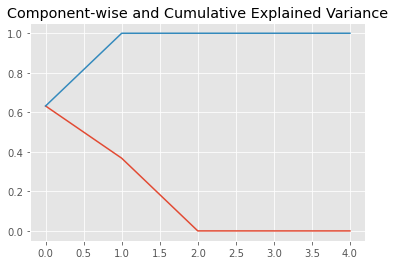

In [85]:
from sklearn.decomposition import PCA
X=cust_outcome1
pca = PCA(n_components=5) #We will choose five components 
pca_result = pca.fit_transform(X) 
plt.plot(range(5), pca.explained_variance_ratio_) 
plt.plot(range(5), np.cumsum(pca.explained_variance_ratio_)) 
plt.title("Component-wise and Cumulative Explained Variance")

# Q6.Feature Engineering

Feature engineering is the process of using domain knowledge to select and transform the most relevant variables from the given data while creating a predictive model using machine learning. The goal of feature engineering and selection is to enhance the performance of machine learning algorithms.

In [62]:
cust_outcome1.reset_index(drop=True, inplace=True)
cust_outcome1.shape

(24429, 58)

In [63]:
cust_outcome1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,month_dec,day_of_week_thu,day_of_week_mon,day_of_week_wed,day_of_week_tue,day_of_week_fri,poutcome_nonexistent,poutcome_failure,poutcome_success
count,24429.000000,24429.000000,24429.000000,24429.000000,24429.000000,24429.000000,24429.000000,24429.000000,24429.000000,24429.000000,...,24429.000000,24429.000000,24429.000000,24429.000000,24429.000000,24429.000000,24429.00000,24429.000000,24429.000000,24429.000000
mean,0.136873,259.147857,2.532605,956.645217,0.193827,-0.365194,0.087344,0.183220,-0.382413,-0.233659,...,0.020181,0.015760,0.190348,0.203815,0.210692,0.195915,0.19923,0.113594,0.847640,0.038765
std,0.689440,262.029681,2.746176,200.663412,0.522744,0.502634,0.635361,0.742901,0.487383,0.582065,...,0.140622,0.124548,0.392583,0.402841,0.407809,0.396911,0.39943,0.317325,0.359377,0.193039
min,-1.333333,0.000000,1.000000,0.000000,0.000000,-1.406250,-1.352557,-1.428571,-1.157346,-1.762791,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,-0.400000,103.000000,1.000000,999.000000,0.000000,-0.906250,-0.401523,-0.142857,-0.971217,-0.712403,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
50%,0.000000,181.000000,2.000000,999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
75%,0.600000,321.000000,3.000000,999.000000,0.000000,0.093750,0.598477,0.857143,0.028783,0.287597,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
max,3.866667,4918.000000,43.000000,999.000000,7.000000,0.093750,1.439608,1.857143,0.051809,0.287597,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [64]:
cust_outcome1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24429 entries, 0 to 24428
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            24429 non-null  float64
 1   duration                       24429 non-null  int64  
 2   campaign                       24429 non-null  int64  
 3   pdays                          24429 non-null  int64  
 4   previous                       24429 non-null  int64  
 5   y                              24429 non-null  object 
 6   emp.var.rate                   24429 non-null  float64
 7   cons.price.idx                 24429 non-null  float64
 8   cons.conf.idx                  24429 non-null  float64
 9   euribor3m                      24429 non-null  float64
 10  nr.employed                    24429 non-null  float64
 11  job_admin.                     24429 non-null  float64
 12  job_blue-collar                24429 non-null 

                                    age  duration  campaign     pdays  \
age                            1.000000  0.009308 -0.001032 -0.049334   
duration                       0.009308  1.000000 -0.069556 -0.044498   
campaign                      -0.001032 -0.069556  1.000000  0.054676   
pdays                         -0.049334 -0.044498  0.054676  1.000000   
previous                       0.044985  0.019226 -0.078388 -0.586427   
emp.var.rate                  -0.042587 -0.026991  0.157665  0.269033   
cons.price.idx                -0.029486  0.010685  0.125269  0.071317   
cons.conf.idx                  0.121621 -0.013484 -0.005391 -0.098301   
euribor3m                     -0.028759 -0.031654  0.140997  0.294834   
nr.employed                   -0.056902 -0.042018  0.148450  0.367702   
job_admin.                    -0.088667 -0.007579  0.015407 -0.025715   
job_blue-collar               -0.042406  0.019016 -0.011819  0.057853   
job_technician                 0.037202 -0.006357 -

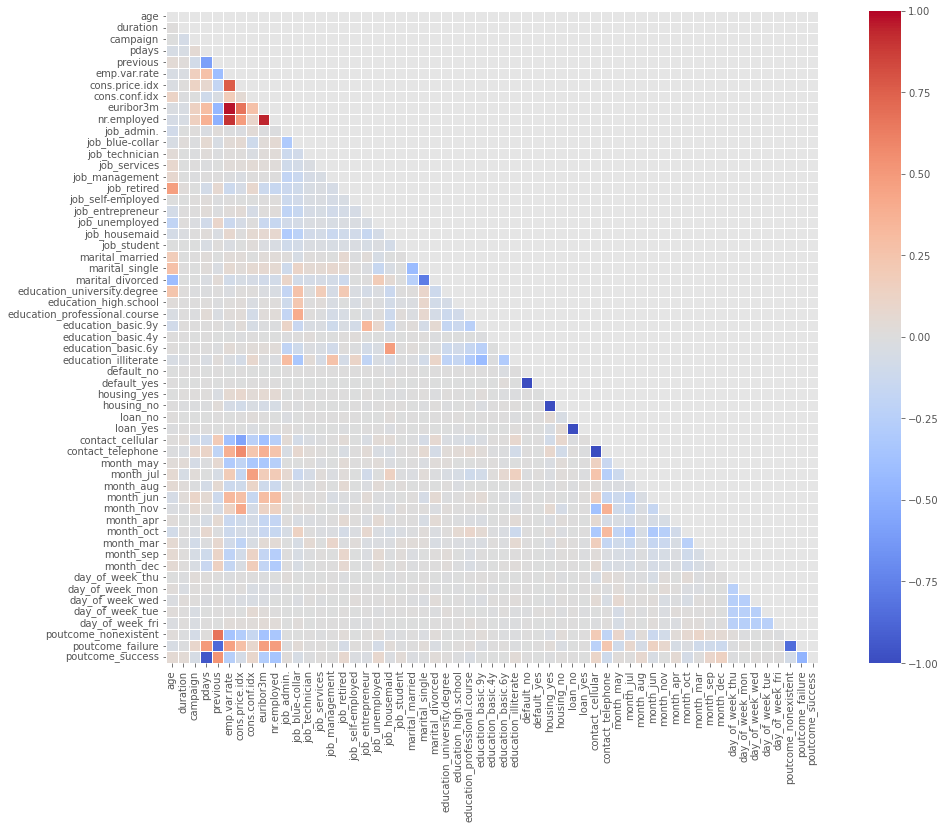

In [86]:
corr = cust_outcome1.corr()
print(corr)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(18,12))

pl = sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1.0, vmin=-1.0, center=0, square=True, linewidths=0.5)
plt.show()

In [87]:
cust_outcome1['euribor3m'].corr(cust_outcome1['emp.var.rate'])

0.9696193053422503

In [88]:
cust_outcome1 = cust_outcome1.astype({'y': int})
cust_outcome1['y'].dtype

dtype('int32')

In [89]:
cust_outcome1['y'].corr(cust_outcome1['emp.var.rate'])

-0.30646583829784235

In [90]:
cust_outcome1['y'].corr(cust_outcome1['euribor3m'])

-0.31603540825902604

We see that euribor3m and emp.var.rate are very highly correlated. To avoid error based on multicollinearity, we need to drop one of these columns. To determine which column to drop, we check each of its correlation with the target variable y. Since emp.var.rate has lower correlation with the target variable, we shall drop it.

In [91]:
cust_outcome1.drop('emp.var.rate', axis=1, inplace=True)

Now we shall check the significance of the variables with respect to target variable y_yes. For analysis we shall use a linear model.
The null hypothesis (N0): The variable does not significantly impact y_yes. p>=0.05
The alternative hypothesis (N1): The variable significantly impacts y_yes. p<0.05

In [92]:
cust_outcome1.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'y',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_technician', 'job_services',
       'job_management', 'job_retired', 'job_self-employed',
       'job_entrepreneur', 'job_unemployed', 'job_housemaid', 'job_student',
       'marital_married', 'marital_single', 'marital_divorced',
       'education_university.degree', 'education_high.school',
       'education_professional.course', 'education_basic.9y',
       'education_basic.4y', 'education_basic.6y', 'education_illiterate',
       'default_no', 'default_yes', 'housing_yes', 'housing_no', 'loan_no',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_may',
       'month_jul', 'month_aug', 'month_jun', 'month_nov', 'month_apr',
       'month_oct', 'month_mar', 'month_sep', 'month_dec', 'day_of_week_thu',
       'day_of_week_mon', 'day_of_week_wed', 'day_of_week_tue',
       'day_of_week_fri', '

In [93]:
import statsmodels.api as sm
X = cust_outcome1[['age', 'duration', 'campaign', 'pdays', 'previous',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_technician', 'job_services',
       'job_management', 'job_retired', 'job_self-employed',
       'job_entrepreneur', 'job_unemployed', 'job_housemaid', 'job_student',
       'marital_married', 'marital_single', 'marital_divorced',
       'education_university.degree', 'education_high.school',
       'education_professional.course', 'education_basic.9y',
       'education_basic.4y', 'education_basic.6y', 'education_illiterate',
       'default_no', 'default_yes', 'housing_yes', 'housing_no', 'loan_no',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_may',
       'month_jul', 'month_aug', 'month_jun', 'month_nov', 'month_apr',
       'month_oct', 'month_mar', 'month_sep', 'month_dec', 'day_of_week_thu',
       'day_of_week_mon', 'day_of_week_wed', 'day_of_week_tue',
       'day_of_week_fri', 'poutcome_nonexistent', 'poutcome_failure',
       'poutcome_success']]
X = sm.add_constant(X)
y = cust_outcome1['y']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     292.0
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:13:06   Log-Likelihood:                -2424.2
No. Observations:               24429   AIC:                             4942.
Df Residuals:                   24382   BIC:                             5323.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

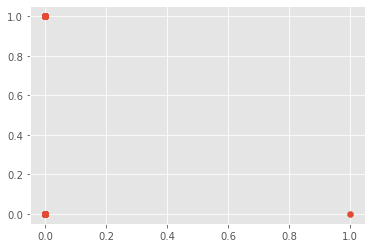

In [94]:
plt.scatter(cust_outcome1['default_yes'], cust_outcome1['y'])

In [102]:
cust_outcome1['default_yes'].value_counts()

0.0    24428
1.0        1
Name: default_yes, dtype: int64

In [103]:
cust_outcome1['default_no'].value_counts()

1.0    24428
0.0        1
Name: default_no, dtype: int64

### We see that default has p>|t| values greater than 0.05. Hence, it does not impact the y variable, being highly probable to be random occurence. The other variables support the alternate hypothesis. ie. it has significance with respect to y. Hence for the final database, we shall not take into account the customer's state.

In [104]:
cust_outcome1.drop(['default_yes', 'default_no'], axis=1, inplace=True)

In [105]:
cust_outcome1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24429 entries, 0 to 32937
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            24429 non-null  float64
 1   duration                       24429 non-null  int64  
 2   campaign                       24429 non-null  int64  
 3   pdays                          24429 non-null  int64  
 4   previous                       24429 non-null  int64  
 5   y                              24429 non-null  int32  
 6   cons.price.idx                 24429 non-null  float64
 7   cons.conf.idx                  24429 non-null  float64
 8   euribor3m                      24429 non-null  float64
 9   nr.employed                    24429 non-null  float64
 10  job_admin.                     24429 non-null  float64
 11  job_blue-collar                24429 non-null  float64
 12  job_technician                 24429 non-null 

                                    age  duration  campaign     pdays  \
age                            1.000000  0.009308 -0.001032 -0.049334   
duration                       0.009308  1.000000 -0.069556 -0.044498   
campaign                      -0.001032 -0.069556  1.000000  0.054676   
pdays                         -0.049334 -0.044498  0.054676  1.000000   
previous                       0.044985  0.019226 -0.078388 -0.586427   
y                              0.046291  0.395508 -0.071136 -0.327448   
cons.price.idx                -0.029486  0.010685  0.125269  0.071317   
cons.conf.idx                  0.121621 -0.013484 -0.005391 -0.098301   
euribor3m                     -0.028759 -0.031654  0.140997  0.294834   
nr.employed                   -0.056902 -0.042018  0.148450  0.367702   
job_admin.                    -0.088667 -0.007579  0.015407 -0.025715   
job_blue-collar               -0.042406  0.019016 -0.011819  0.057853   
job_technician                 0.037202 -0.006357 -

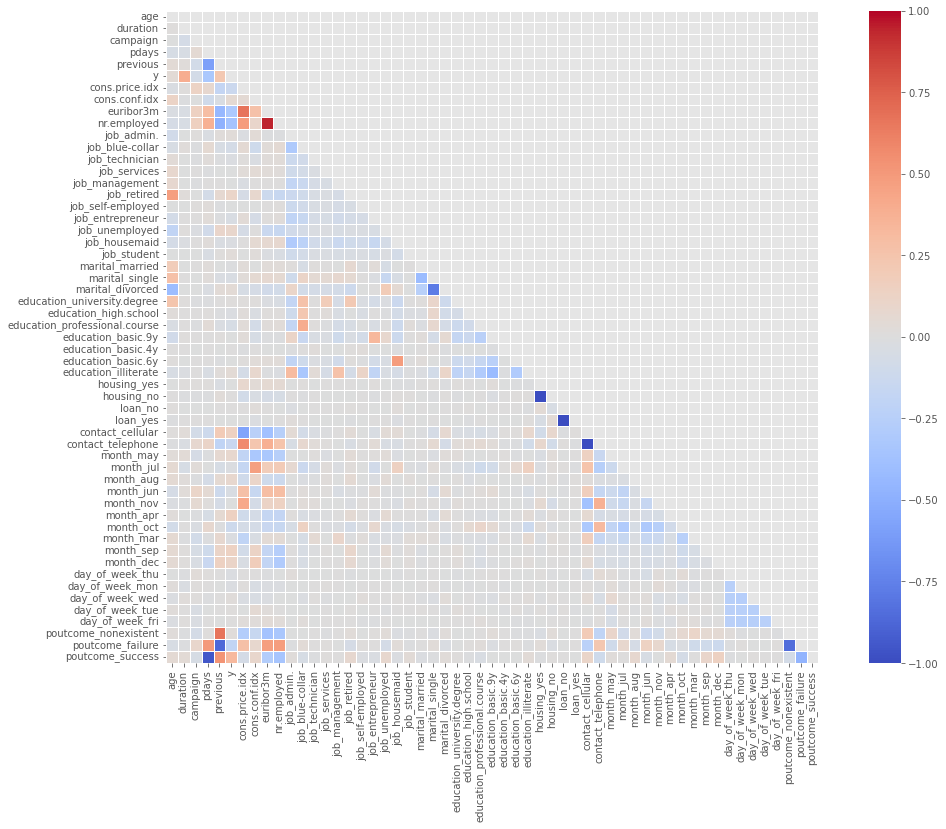

In [106]:
corr = cust_outcome1.corr()
print(corr)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(18,12))

pl = sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1.0, vmin=-1.0, center=0, square=True, linewidths=0.5)
plt.show()

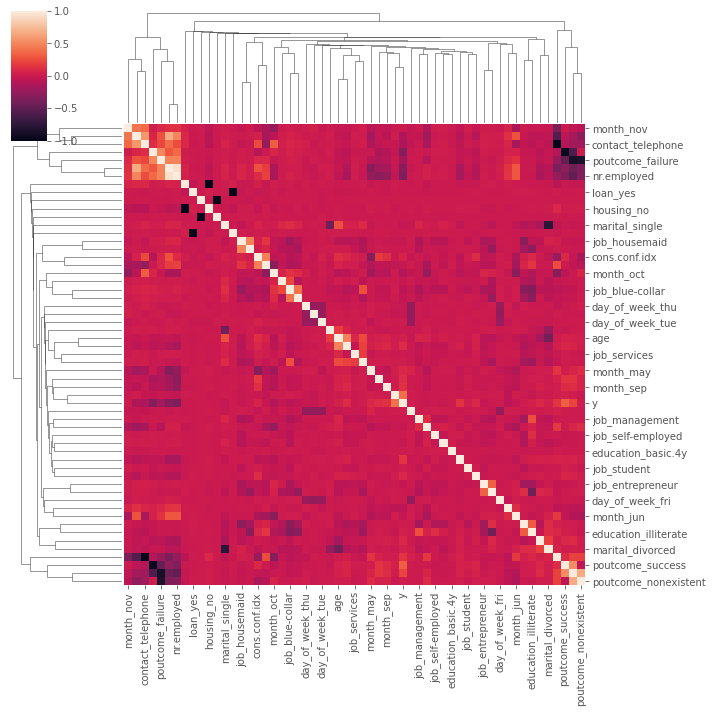

In [132]:
sns.clustermap(cust_outcome1.corr())

This pre-processed dataframe is ready for machine learning.

In [107]:
cust_outcome1.to_csv('data1.csv')